# ***Importing libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Loading data set***

In [3]:
data = pd.read_csv('/content/Energy_consumption.csv')
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


# ***EDA***

In [4]:
data.shape

(1000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [6]:
data.isnull().sum()

,0
Timestamp,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0
RenewableEnergy,0
DayOfWeek,0
Holiday,0


In [7]:
data.duplicated().sum()

0

In [8]:
data.dropna(inplace = True)

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.dtypes

,0
Timestamp,object
Temperature,float64
Humidity,float64
SquareFootage,float64
Occupancy,int64
HVACUsage,object
LightingUsage,object
RenewableEnergy,float64
DayOfWeek,object
Holiday,object


In [11]:
data['HVACUsage'].value_counts()

,count
HVACUsage,
Off,508
On,492


In [12]:
data['LightingUsage'].value_counts()

,count
LightingUsage,
Off,509
On,491


In [13]:
data['DayOfWeek'].value_counts()

,count
DayOfWeek,
Friday,164
Sunday,154
Thursday,146
Tuesday,146
Saturday,143
Wednesday,124
Monday,123


In [14]:
data['Holiday'].value_counts()

,count
Holiday,
No,533
Yes,467


In [15]:
m = {'On':0, 'Off':0}
data['HVACUsage'] = data['HVACUsage'].map(m)

In [16]:
g = {'On':0, 'Off':1}
data['LightingUsage'] = data['LightingUsage'].map(g)

In [17]:
c = {'Yes':1, 'No':0}
data['Holiday'] = data['Holiday'].map(c)

In [18]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()
data['DayOfWeek'] = le.fit_transform(data['DayOfWeek'])

In [19]:
le = LabelEncoder()
data['Timestamp'] = le.fit_transform(data['Timestamp'])

# ***Data Visualization***

In [20]:
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,0,25.139433,43.431581,1565.693999,5,0,1,2.774699,1,0,75.364373
1,1,27.731651,54.225919,1411.064918,1,0,0,21.831384,2,0,83.401855
2,2,28.704277,58.907658,1755.715009,2,0,1,6.764672,3,0,78.270888
3,3,20.080469,50.371637,1452.316318,1,0,0,8.623447,6,0,56.519850
4,4,23.097359,51.401421,1094.130359,9,0,1,3.071969,0,0,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,995,28.619382,48.850160,1080.087000,5,0,1,21.194696,2,0,82.306692
996,996,23.836647,47.256435,1705.235156,4,0,0,25.748176,5,1,66.577320
997,997,23.005340,48.720501,1320.285281,6,0,0,0.297079,0,1,72.753471
998,998,25.138365,31.306459,1309.079719,3,0,1,20.425163,4,1,76.950389


In [ ]:
sns.pairplot(data)

<Axes: >

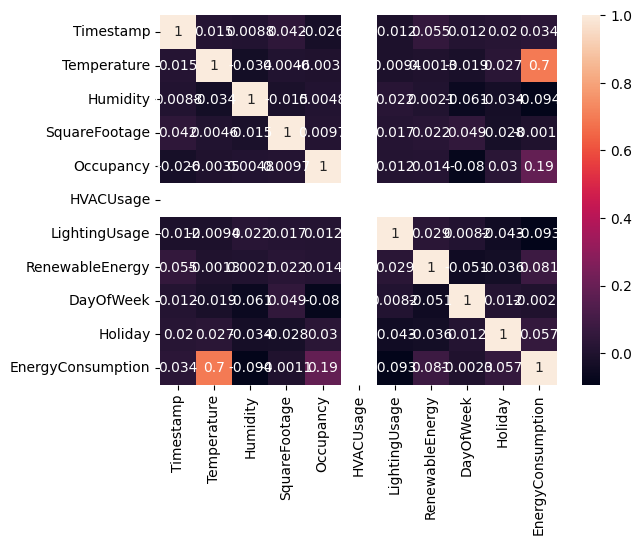

In [ ]:
sns.heatmap(data.corr(), annot = True)

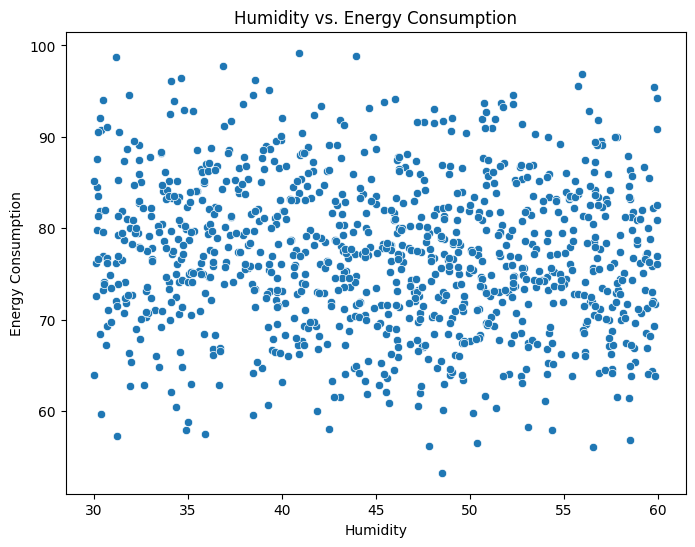

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity', y='EnergyConsumption', data=data)
plt.title('Humidity vs. Energy Consumption')
plt.xlabel('Humidity')
plt.ylabel('Energy Consumption')
plt.show()


In [ ]:
data.skew()

,0
Timestamp,0.000000
Temperature,0.088428
Humidity,-0.066463
SquareFootage,-0.019441
Occupancy,-0.055229
HVACUsage,0.000000
LightingUsage,-0.036060
RenewableEnergy,-0.021597
DayOfWeek,-0.006485
Holiday,0.132487


In [ ]:
data.corr()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,1.000000,0.015110,0.008777,0.042095,-0.026153,NaN,-0.012026,0.055168,0.011976,0.020292,0.034407
Temperature,0.015110,1.000000,-0.034032,0.004551,-0.003490,NaN,-0.009446,-0.001350,-0.018714,0.026893,0.696410
Humidity,0.008777,-0.034032,1.000000,-0.014651,0.004766,NaN,0.022207,0.002052,-0.061004,-0.033733,-0.093583
SquareFootage,0.042095,0.004551,-0.014651,1.000000,0.009696,NaN,0.016915,0.022196,0.049412,-0.027951,-0.001129
Occupancy,-0.026153,-0.003490,0.004766,0.009696,1.000000,NaN,0.012062,0.013680,-0.080218,0.029863,0.186580
HVACUsage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LightingUsage,-0.012026,-0.009446,0.022207,0.016915,0.012062,NaN,1.000000,0.029295,0.008190,-0.042913,-0.093423
RenewableEnergy,0.055168,-0.001350,0.002052,0.022196,0.013680,NaN,0.029295,1.000000,-0.050636,-0.035892,0.081160
DayOfWeek,0.011976,-0.018714,-0.061004,0.049412,-0.080218,NaN,0.008190,-0.050636,1.000000,0.012257,-0.002291
Holiday,0.020292,0.026893,-0.033733,-0.027951,0.029863,NaN,-0.042913,-0.035892,0.012257,1.000000,0.056676


# ***Data Preprocessing***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


# ***Splitting Data***

In [ ]:
data.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption', 'TotalUsage', 'HumiditySquared',
       'TemperatureHumidityInteraction'],
      dtype='object')

In [ ]:
x = data.iloc[ : , :10]
x

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday
0,0,25.139433,43.431581,1565.693999,5,0,1,2.774699,1,0
1,1,27.731651,54.225919,1411.064918,1,0,0,21.831384,2,0
2,2,28.704277,58.907658,1755.715009,2,0,1,6.764672,3,0
3,3,20.080469,50.371637,1452.316318,1,0,0,8.623447,6,0
4,4,23.097359,51.401421,1094.130359,9,0,1,3.071969,0,0
...,...,...,...,...,...,...,...,...,...,...
995,995,28.619382,48.850160,1080.087000,5,0,1,21.194696,2,0
996,996,23.836647,47.256435,1705.235156,4,0,0,25.748176,5,1
997,997,23.005340,48.720501,1320.285281,6,0,0,0.297079,0,1
998,998,25.138365,31.306459,1309.079719,3,0,1,20.425163,4,1


In [ ]:
y = data.iloc[ : , 10: ]
y

,EnergyConsumption,TotalUsage,HumiditySquared,TemperatureHumidityInteraction
0,75.364373,1,1886.302246,1091.845345
1,83.401855,0,2940.450246,1503.774223
2,78.270888,1,3470.112141,1690.901717
3,56.519850,0,2537.301829,1011.486123
4,70.811732,1,2642.106116,1187.237095
...,...,...,...,...
995,82.306692,1,2386.338108,1398.061397
996,66.577320,0,2233.170696,1126.434961
997,72.753471,0,2373.687214,1120.831700
998,76.950389,1,980.094389,786.993195


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 2, random_state= 10)

# ***Modeling***

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4, min_samples_split=2)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
model.score(x_train, y_train)

0.5686738461636316

In [ ]:
model.score(x_test, y_test)

0.5400096802034784

# ***Model Evaluation***

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[8.23559102e+01, 5.20833333e-01, 1.99851306e+03, 1.23051414e+03],
       [8.49912019e+01, 5.55555556e-01, 1.66245042e+03, 1.15627146e+03],
       [7.20645401e+01, 6.78571429e-01, 2.65816775e+03, 1.15219349e+03],
       [7.79856767e+01, 4.39393939e-01, 1.11149832e+03, 8.30821375e+02],
       [7.79856767e+01, 4.39393939e-01, 1.11149832e+03, 8.30821375e+02],
       [7.22507220e+01, 5.54216867e-01, 2.34512030e+03, 1.11352044e+03],
       [7.05499001e+01, 4.83333333e-01, 3.37998985e+03, 1.32198215e+03],
       [8.22188343e+01, 4.82758621e-01, 3.37210621e+03, 1.59997838e+03],
       [7.78502066e+01, 4.91525424e-01, 9.61873615e+02, 7.68502212e+02],
       [7.78502066e+01, 4.91525424e-01, 9.61873615e+02, 7.68502212e+02],
       [8.49912019e+01, 5.55555556e-01, 1.66245042e+03, 1.15627146e+03],
       [8.23636877e+01, 4.35897436e-01, 2.30896737e+03, 1.35323987e+03],
       [8.36189281e+01, 3.65853659e-01, 2.68320776e+03, 1.41682647e+03],
       [8.49912019e+01, 5.55555556e-01, 1.66245042e

In [ ]:
from sklearn.metrics import mean_squared_error
matrix = mean(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)


0.5614233411722509